# Import libraries

In [4]:
import pandas as pd
import numpy as np

# Import Functions

In [5]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [8]:
filepath=r'dataset/2020-Apr.csv'
file_tag = 'dataset/2020-Apr.csv'

# Load File

### method 1 - random sample

In [7]:
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0010, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])


# Display the first 100 rows of the sample
print(df['event_type'].value_counts(normalize=True))

df.head(20)

event_type
view        0.935995
cart        0.049302
purchase    0.014702
Name: proportion, dtype: float64


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
14636947,2020-04-10 01:21:33 UTC,view,6801195,2053013555220840837,appliances.kitchen.juicer,samsung,145.15,512495389,d79a50c4-cfb3-4530-900a-9d3842075ef3
42767893,2020-04-22 02:39:56 UTC,view,15900034,2053013566142809077,construction.tools.generator,rondell,54.03,618833038,2829b6b4-3137-4a32-beef-841666e202ac
42948621,2020-04-22 04:47:56 UTC,view,18400053,2053013556252639687,construction.tools.drill,NaN,87.33,645247854,c4eb5458-7208-47a1-ac24-abf791e31052
13589831,2020-04-09 11:26:59 UTC,view,1004957,2232732093077520756,construction.tools.light,xiaomi,297.02,622272624,68018fea-f8ad-4d6f-9e7c-e27b11867b6b
7020924,2020-04-05 11:04:56 UTC,view,10800145,2053013555724157349,sport.bicycle,redmond,79.51,616386761,c8b2e94d-5a56-4589-a80b-c4891c9d069e
31769226,2020-04-17 12:24:36 UTC,view,24100536,2232732100954423843,appliances.personal.massager,NaN,2.10,548132237,1bdb1d33-b194-400f-800f-ff2ea831e479
65464276,2020-04-30 13:35:36 UTC,view,8600192,2232732099595469319,furniture.living_room.chair,polaris,37.30,645483253,6469d0e3-9bba-4978-87ba-c0f99fd18891
38673226,2020-04-20 09:00:19 UTC,view,8700151,2232732089587859740,appliances.personal.hair_cutter,scarlett,16.19,521441435,cf2bd2d4-7422-4074-8bde-0476918f68ba
29976882,2020-04-16 18:14:00 UTC,view,1004873,2232732093077520756,construction.tools.light,samsung,356.74,525624526,1d0f3c8d-a9d6-4293-8e80-0bd4dd2d4785
55660446,2020-04-26 18:53:01 UTC,view,100212182,2053013551932506308,construction.tools.drill,adidas,81.31,646123800,5429d501-0562-414e-bc3b-73e16476cf1a


### >> method 1.1 - random sample with undersample of the negative class (remove 30000 rows) [BEING USED]

In [20]:
import pandas as pd

# Define a flag for test data
test_data = True  # Altere para False se quiser carregar todo o dataset

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")
    df = df.sample(frac=0.008, replace=False)
else:
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Exibir a contagem de classes antes do undersampling
print("Distribuição original:")
print(df['event_type'].value_counts(normalize=True))

# Separar as classes
df_not_purchase = df[df['event_type'] != 'purchase']
df_purchase = df[df['event_type'] == 'purchase']

# Verificar quantas linhas há na classe not_purchase
num_not_purchase = len(df_not_purchase)

# Definir o número de linhas a serem removidas
rows_to_remove = 335082

# Verificar se há linhas suficientes para remover
if num_not_purchase > rows_to_remove:
    # Remover 30.000 linhas da classe not_purchase
    df_not_purchase_downsampled = df_not_purchase.sample(n=num_not_purchase - rows_to_remove, random_state=42)
else:
    print(f"A classe 'not_purchase' só contém {num_not_purchase} linhas. Usando todas as linhas.")
    df_not_purchase_downsampled = df_not_purchase.copy()  # Manter todas as linhas

# Combinar a classe downsampled com a classe purchase
df_balanced = pd.concat([df_not_purchase_downsampled, df_purchase])

# Embaralhar o dataset combinado
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição de classes
print("Distribuição após undersampling:")
print(df['event_type'].value_counts(normalize=True))

# Exibir as primeiras 20 linhas do dataset equilibrado
print(df.head(20))
df.info



Distribuição original:
event_type
view        0.936506
cart        0.048771
purchase    0.014723
Name: proportion, dtype: float64
Distribuição após undersampling:
event_type
view        0.912206
cart        0.048110
purchase    0.039685
Name: proportion, dtype: float64
                 event_time event_type  product_id          category_id  \
0   2020-04-27 08:08:55 UTC       view     1002827  2232732093077520756   
1   2020-04-21 08:00:30 UTC       view     1004785  2232732093077520756   
2   2020-04-27 04:34:21 UTC       view   100217846  2053013559935238815   
3   2020-04-07 11:41:35 UTC       view   100041778  2053013554658804075   
4   2020-04-09 18:10:56 UTC       view    10800158  2053013555724157349   
5   2020-04-26 17:27:52 UTC       view     9200591  2232732104343421549   
6   2020-04-24 05:14:13 UTC       view   100199541  2232732093077520756   
7   2020-04-24 07:11:42 UTC       view     1004886  2232732093077520756   
8   2020-04-07 08:18:49 UTC       view     2701305  223

<bound method DataFrame.info of                      event_time event_type  product_id          category_id  \
0       2020-04-27 08:08:55 UTC       view     1002827  2232732093077520756   
1       2020-04-21 08:00:30 UTC       view     1004785  2232732093077520756   
2       2020-04-27 04:34:21 UTC       view   100217846  2053013559935238815   
3       2020-04-07 11:41:35 UTC       view   100041778  2053013554658804075   
4       2020-04-09 18:10:56 UTC       view    10800158  2053013555724157349   
...                         ...        ...         ...                  ...   
197627  2020-04-16 06:40:33 UTC       view     1004210  2232732093077520756   
197628  2020-04-10 15:52:46 UTC       view     1307555  2053013554658804075   
197629  2020-04-17 12:16:36 UTC       view   100143638  2232732093077520756   
197630  2020-04-07 10:53:43 UTC       view   100166168  2053013553325015316   
197631  2020-04-26 21:29:57 UTC       view   100066114  2232732098228126185   

                   

In [21]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-27 08:08:55 UTC,view,1002827,2232732093077520756,construction.tools.light,leeco,390.22,513302082,7be20283-9063-4598-9cbc-0d23546e4094
1,2020-04-21 08:00:30 UTC,view,1004785,2232732093077520756,construction.tools.light,huawei,263.04,613400337,83b3e9a2-fbac-4dbc-89ce-ac1e265de965
2,2020-04-27 04:34:21 UTC,view,100217846,2053013559935238815,apparel.shoes,decathlon,19.05,594327598,f8d87acc-1bc5-41a0-96d8-0a9d066f0ca2
3,2020-04-07 11:41:35 UTC,view,100041778,2053013554658804075,electronics.audio.headphone,asus,514.79,637847434,10813031-7cce-496d-b6cf-fbe01cf2ed12
4,2020-04-09 18:10:56 UTC,view,10800158,2053013555724157349,sport.bicycle,scarlett,17.76,515428283,e14e7d9e-9324-410e-8fd2-74d2832ffe9d


### method 2 - random sample from each day of the dataset

In [22]:
import pandas as pd

# Assuming your date column is 'event_time' and the target is 'event_type'
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    # Converting the time column to datetime, if necessary
    df['event_time'] = pd.to_datetime(df['event_time'])

    # Total number of rows you want in the final sample (1% of the total)
    total_samples = int(len(df) * 0.001)  # For example, 66,000 if the dataset has 66 million rows

    # Total count of rows per day
    daily_counts = df.groupby(df['event_time'].dt.date)['event_time'].count()

    # Function to perform balanced sampling per day
    def sample_per_day(group, frac, target_col='event_type'):
        # Split the group into 'purchase' and 'not purchase'
        purchase = group[group[target_col] == 'purchase']
        not_purchase = group[group[target_col] != 'purchase']

        # Calculate the number of samples based on the desired fraction per day
        total_samples_per_day = int(len(group) * frac)
        num_not_purchase = int(total_samples_per_day * 0.9)  # 90% of not purchases
        num_purchase = total_samples_per_day - num_not_purchase  # 10% of purchases

        # Sample each group
        sampled_not_purchase = not_purchase.sample(n=min(num_not_purchase, len(not_purchase)), replace=False)
        sampled_purchase = purchase.sample(n=min(num_purchase, len(purchase)), replace=False)

        # Return the combination of the two samples
        return pd.concat([sampled_not_purchase, sampled_purchase])

    # Determine the sampling fraction per day (based on the proportion of total desired samples)
    frac_per_day = total_samples / len(df)  # 1% of the total in the end

    # Apply the sampling function per day
    df = df.groupby(df['event_time'].dt.date).apply(sample_per_day, frac=frac_per_day).reset_index(drop=True)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Display the first 100 rows of the sample
print(df['event_type'].value_counts(normalize=True))
print(df.head(20))




KeyboardInterrupt: 

### method 3 - joao

In [74]:
# Define a flag for test data
test_data = False

# Define a function to sample a fraction from each group
def sample_per_day(group, fraction=0.001):
    return group.sample(frac=fraction)

# Check if test data is enabled
if test_data:
    df = pd.read_csv(filepath)
    df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

    # Apply the sampling to each group (grouped by event date) with 1% sample
    df = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)


else:
    df = pd.read_csv(filepath)

    df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

    # Apply the sampling to each group (grouped by event date) with 10% sample
    df = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, 0.001)).reset_index(drop=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66591 entries, 0 to 66590
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     66591 non-null  datetime64[ns, UTC]
 1   event_type     66591 non-null  object             
 2   product_id     66591 non-null  int64              
 3   category_id    66591 non-null  int64              
 4   category_code  59845 non-null  object             
 5   brand          57702 non-null  object             
 6   price          66591 non-null  float64            
 7   user_id        66591 non-null  int64              
 8   user_session   66591 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 4.6+ MB


In [75]:

df['conversion'] = df['event_type'].apply(lambda x: 'purchase' if x == 'purchase' else 'not_purchase')

In [76]:
target = "conversion"

values = df[target].value_counts(normalize=True) 
print(values)

conversion
not_purchase    0.985794
purchase        0.014206
Name: proportion, dtype: float64


#### Sampling

In [77]:
# Separate the majority (0) and minority (1) classes
df_majority = df[df['conversion'] == 'not_purchase']
df_minority = df[df['conversion'] == 'purchase']

# Calculate the number of minority rows needed to make a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Downsample the minority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Combine the majority class with the downsampled minority class
df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the combined dataset
df = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution to verify the 90/10 split
print(df['conversion'].value_counts(normalize=True) * 100)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [78]:
# Separate the majority (0) and minority (1) classes
df_majority = df[df['conversion'] == 'not_purchase']
df_minority = df[df['conversion'] == 'purchase']

# Calculate the number of minority rows needed to make a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Ensure that we do not request more samples than available in the minority class
desired_minority_count = min(desired_minority_count, len(df_minority))

# Downsample the minority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Combine the majority class with the downsampled minority class
df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the combined dataset
df = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution to verify the 90/10 split
print(df['conversion'].value_counts(normalize=True) * 100)


conversion
not_purchase    98.579388
purchase         1.420612
Name: proportion, dtype: float64


In [87]:
# Define the fraction for sampling (1% of total data)
sample_fraction = 0.01

# Step 1: Ensure 'event_time' is in datetime format
df['event_time'] = pd.to_datetime(df['event_time'], infer_datetime_format=True)

# Step 2: Sample 1% of data per day to ensure all days are represented
def sample_per_day(group, sample_fraction=0.001):
    return group.sample(frac=sample_fraction, random_state=42)

df_sampled = df.groupby(df['event_time'].dt.date).apply(lambda x: sample_per_day(x, sample_fraction)).reset_index(drop=True)

# Step 3: Separate the majority (not_purchase) and minority (purchase) classes
df_majority = df_sampled[df_sampled['conversion'] == 'not_purchase']
df_minority = df_sampled[df_sampled['conversion'] == 'purchase']

# Step 4: Calculate the number of minority rows needed to achieve a 90/10 split
# Let total_rows be the total number of rows after undersampling
total_rows = len(df_majority) / 0.9  # 90% majority, 10% minority
desired_minority_count = int(total_rows * 0.1)  # 10% of the total should be minority

# Step 5: Ensure we do not request more samples than available in the minority class
desired_minority_count = min(desired_minority_count, len(df_minority))

# Step 6: Downsample the majority class to the desired number of rows
df_minority_downsampled = df_minority.sample(n=desired_minority_count, random_state=42)

# Step 7: Combine the majority class with the downsampled minority class
df_balanced = pd.concat([df_majority, df_minority_downsampled])

# Step 8: Shuffle the combined dataset
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(df['conversion'].value_counts(normalize=True) * 100)


conversion
not_purchase    98.353293
purchase         1.646707
Name: proportion, dtype: float64


## Add columns based on dataset col

#### Data granularity

##### Split category_code column

In [23]:

# Create new columns based on the column category_based
df['category_code_lvl_1'] = df['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df['category_code_lvl_2'] = df['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df['category_code_lvl_3'] = df['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df['conversion'] = 'not_purchase'  # Definindo valor padrão
df.loc[df['event_type']=='purchase', 'conversion'] = 'purchase'

df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion
0,2020-04-27 08:08:55 UTC,view,1002827,2232732093077520756,construction.tools.light,leeco,390.22,513302082,7be20283-9063-4598-9cbc-0d23546e4094,construction,tools,light,not_purchase
1,2020-04-21 08:00:30 UTC,view,1004785,2232732093077520756,construction.tools.light,huawei,263.04,613400337,83b3e9a2-fbac-4dbc-89ce-ac1e265de965,construction,tools,light,not_purchase
2,2020-04-27 04:34:21 UTC,view,100217846,2053013559935238815,apparel.shoes,decathlon,19.05,594327598,f8d87acc-1bc5-41a0-96d8-0a9d066f0ca2,apparel,shoes,NaN,not_purchase
3,2020-04-07 11:41:35 UTC,view,100041778,2053013554658804075,electronics.audio.headphone,asus,514.79,637847434,10813031-7cce-496d-b6cf-fbe01cf2ed12,electronics,audio,headphone,not_purchase
4,2020-04-09 18:10:56 UTC,view,10800158,2053013555724157349,sport.bicycle,scarlett,17.76,515428283,e14e7d9e-9324-410e-8fd2-74d2832ffe9d,sport,bicycle,NaN,not_purchase
5,2020-04-26 17:27:52 UTC,view,9200591,2232732104343421549,apparel.scarf,kingston,143.89,622756643,bc4f80a1-bf6c-4cc0-858c-af2adfe3b039,apparel,scarf,NaN,not_purchase
6,2020-04-24 05:14:13 UTC,view,100199541,2232732093077520756,construction.tools.light,oppo,231.64,645926973,31e319c9-aaf3-4a6f-a065-c9cfaf3fc281,construction,tools,light,not_purchase
7,2020-04-24 07:11:42 UTC,view,1004886,2232732093077520756,construction.tools.light,oppo,125.71,542136089,af799920-e975-4211-80a1-808d5e1cbf54,construction,tools,light,not_purchase
8,2020-04-07 08:18:49 UTC,view,2701305,2232732091718566220,appliances.kitchen.refrigerators,samsung,519.42,513038051,c5fe4e35-c062-4124-973a-2cbe679e10c0,appliances,kitchen,refrigerators,not_purchase
9,2020-04-16 07:51:30 UTC,view,18700005,2232732100056842769,appliances.personal.massager,NaN,1276.48,642164753,49e5cf37-a71f-4f0a-abf1-57df95703dba,appliances,personal,massager,not_purchase


### Convert category_code_level_2 and category_code_level_3 into funnel pages.
- fill ategory_code_level_3 with values from category_code_level_2

This is needed because some product categories don't have category_code_lvl

In [25]:
# Atualizar a coluna category_code_lvl_2_new, preservando os valores NaN
df['category_code_lvl_2_new'] = df['category_code_lvl_2'].where(df['category_code_lvl_2'].isna(), df['category_code_lvl_1'] + "/" + df['category_code_lvl_2'])

# Primeiro, criar a coluna category_code_lvl_3_new com a concatenação de category_code_lvl_2 e category_code_lvl_3
df['category_code_lvl_3_new'] = df['category_code_lvl_2_new'] + "/" + df['category_code_lvl_3']

# Em seguida, preencher os NaN da coluna category_code_lvl_3_new com o valor já concatenado de category_code_lvl_2
df['category_code_lvl_3_new'] = df['category_code_lvl_3_new'].fillna(df['category_code_lvl_2_new'])

# Verificar as primeiras linhas do DataFrame
df.head(10)



,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,category_code_lvl_2_new,category_code_lvl_3_new
0,2020-04-27 08:08:55 UTC,view,1002827,2232732093077520756,construction.tools.light,leeco,390.22,513302082,7be20283-9063-4598-9cbc-0d23546e4094,construction,tools,light,not_purchase,construction/tools,construction/tools/light
1,2020-04-21 08:00:30 UTC,view,1004785,2232732093077520756,construction.tools.light,huawei,263.04,613400337,83b3e9a2-fbac-4dbc-89ce-ac1e265de965,construction,tools,light,not_purchase,construction/tools,construction/tools/light
2,2020-04-27 04:34:21 UTC,view,100217846,2053013559935238815,apparel.shoes,decathlon,19.05,594327598,f8d87acc-1bc5-41a0-96d8-0a9d066f0ca2,apparel,shoes,NaN,not_purchase,apparel/shoes,apparel/shoes
3,2020-04-07 11:41:35 UTC,view,100041778,2053013554658804075,electronics.audio.headphone,asus,514.79,637847434,10813031-7cce-496d-b6cf-fbe01cf2ed12,electronics,audio,headphone,not_purchase,electronics/audio,electronics/audio/headphone
4,2020-04-09 18:10:56 UTC,view,10800158,2053013555724157349,sport.bicycle,scarlett,17.76,515428283,e14e7d9e-9324-410e-8fd2-74d2832ffe9d,sport,bicycle,NaN,not_purchase,sport/bicycle,sport/bicycle
5,2020-04-26 17:27:52 UTC,view,9200591,2232732104343421549,apparel.scarf,kingston,143.89,622756643,bc4f80a1-bf6c-4cc0-858c-af2adfe3b039,apparel,scarf,NaN,not_purchase,apparel/scarf,apparel/scarf
6,2020-04-24 05:14:13 UTC,view,100199541,2232732093077520756,construction.tools.light,oppo,231.64,645926973,31e319c9-aaf3-4a6f-a065-c9cfaf3fc281,construction,tools,light,not_purchase,construction/tools,construction/tools/light
7,2020-04-24 07:11:42 UTC,view,1004886,2232732093077520756,construction.tools.light,oppo,125.71,542136089,af799920-e975-4211-80a1-808d5e1cbf54,construction,tools,light,not_purchase,construction/tools,construction/tools/light
8,2020-04-07 08:18:49 UTC,view,2701305,2232732091718566220,appliances.kitchen.refrigerators,samsung,519.42,513038051,c5fe4e35-c062-4124-973a-2cbe679e10c0,appliances,kitchen,refrigerators,not_purchase,appliances/kitchen,appliances/kitchen/refrigerators
9,2020-04-16 07:51:30 UTC,view,18700005,2232732100056842769,appliances.personal.massager,NaN,1276.48,642164753,49e5cf37-a71f-4f0a-abf1-57df95703dba,appliances,personal,massager,not_purchase,appliances/personal,appliances/personal/massager


In [26]:
#drop columns
# Remover as colunas temporárias (category_code_lvl_2_new e category_code_lvl_3_new se não precisar mais delas)
df.drop(columns=['category_code_lvl_2', 'category_code_lvl_3'], inplace=True)

df.rename(columns={
    'category_code_lvl_2_new': 'category_code_lvl_2', 
    'category_code_lvl_3_new': 'category_code_lvl_3'
}, inplace=True)

# Verificar as primeiras linhas do DataFrame
df.head(10)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,conversion,category_code_lvl_2,category_code_lvl_3
0,2020-04-27 08:08:55 UTC,view,1002827,2232732093077520756,construction.tools.light,leeco,390.22,513302082,7be20283-9063-4598-9cbc-0d23546e4094,construction,not_purchase,construction/tools,construction/tools/light
1,2020-04-21 08:00:30 UTC,view,1004785,2232732093077520756,construction.tools.light,huawei,263.04,613400337,83b3e9a2-fbac-4dbc-89ce-ac1e265de965,construction,not_purchase,construction/tools,construction/tools/light
2,2020-04-27 04:34:21 UTC,view,100217846,2053013559935238815,apparel.shoes,decathlon,19.05,594327598,f8d87acc-1bc5-41a0-96d8-0a9d066f0ca2,apparel,not_purchase,apparel/shoes,apparel/shoes
3,2020-04-07 11:41:35 UTC,view,100041778,2053013554658804075,electronics.audio.headphone,asus,514.79,637847434,10813031-7cce-496d-b6cf-fbe01cf2ed12,electronics,not_purchase,electronics/audio,electronics/audio/headphone
4,2020-04-09 18:10:56 UTC,view,10800158,2053013555724157349,sport.bicycle,scarlett,17.76,515428283,e14e7d9e-9324-410e-8fd2-74d2832ffe9d,sport,not_purchase,sport/bicycle,sport/bicycle
5,2020-04-26 17:27:52 UTC,view,9200591,2232732104343421549,apparel.scarf,kingston,143.89,622756643,bc4f80a1-bf6c-4cc0-858c-af2adfe3b039,apparel,not_purchase,apparel/scarf,apparel/scarf
6,2020-04-24 05:14:13 UTC,view,100199541,2232732093077520756,construction.tools.light,oppo,231.64,645926973,31e319c9-aaf3-4a6f-a065-c9cfaf3fc281,construction,not_purchase,construction/tools,construction/tools/light
7,2020-04-24 07:11:42 UTC,view,1004886,2232732093077520756,construction.tools.light,oppo,125.71,542136089,af799920-e975-4211-80a1-808d5e1cbf54,construction,not_purchase,construction/tools,construction/tools/light
8,2020-04-07 08:18:49 UTC,view,2701305,2232732091718566220,appliances.kitchen.refrigerators,samsung,519.42,513038051,c5fe4e35-c062-4124-973a-2cbe679e10c0,appliances,not_purchase,appliances/kitchen,appliances/kitchen/refrigerators
9,2020-04-16 07:51:30 UTC,view,18700005,2232732100056842769,appliances.personal.massager,NaN,1276.48,642164753,49e5cf37-a71f-4f0a-abf1-57df95703dba,appliances,not_purchase,appliances/personal,appliances/personal/massager


In [27]:
# Definir a nova ordem das colunas
new_column_order = [
    'event_time', 
    'event_type', 
    'product_id', 
    'category_id', 
    'category_code', 
    'category_code_lvl_1',  # Mover esta coluna para perto dos níveis 2 e 3
    'category_code_lvl_2', 
    'category_code_lvl_3', 
    'brand', 
    'price', 
    'user_id', 
    'user_session', 
    'conversion'
]

# Reorganizar as colunas do DataFrame
df = df[new_column_order]

# Verificar as primeiras linhas do DataFrame com a nova ordem de colunas
df.head(10)

,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion
0,2020-04-27 08:08:55 UTC,view,1002827,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,leeco,390.22,513302082,7be20283-9063-4598-9cbc-0d23546e4094,not_purchase
1,2020-04-21 08:00:30 UTC,view,1004785,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,huawei,263.04,613400337,83b3e9a2-fbac-4dbc-89ce-ac1e265de965,not_purchase
2,2020-04-27 04:34:21 UTC,view,100217846,2053013559935238815,apparel.shoes,apparel,apparel/shoes,apparel/shoes,decathlon,19.05,594327598,f8d87acc-1bc5-41a0-96d8-0a9d066f0ca2,not_purchase
3,2020-04-07 11:41:35 UTC,view,100041778,2053013554658804075,electronics.audio.headphone,electronics,electronics/audio,electronics/audio/headphone,asus,514.79,637847434,10813031-7cce-496d-b6cf-fbe01cf2ed12,not_purchase
4,2020-04-09 18:10:56 UTC,view,10800158,2053013555724157349,sport.bicycle,sport,sport/bicycle,sport/bicycle,scarlett,17.76,515428283,e14e7d9e-9324-410e-8fd2-74d2832ffe9d,not_purchase
5,2020-04-26 17:27:52 UTC,view,9200591,2232732104343421549,apparel.scarf,apparel,apparel/scarf,apparel/scarf,kingston,143.89,622756643,bc4f80a1-bf6c-4cc0-858c-af2adfe3b039,not_purchase
6,2020-04-24 05:14:13 UTC,view,100199541,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,oppo,231.64,645926973,31e319c9-aaf3-4a6f-a065-c9cfaf3fc281,not_purchase
7,2020-04-24 07:11:42 UTC,view,1004886,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,oppo,125.71,542136089,af799920-e975-4211-80a1-808d5e1cbf54,not_purchase
8,2020-04-07 08:18:49 UTC,view,2701305,2232732091718566220,appliances.kitchen.refrigerators,appliances,appliances/kitchen,appliances/kitchen/refrigerators,samsung,519.42,513038051,c5fe4e35-c062-4124-973a-2cbe679e10c0,not_purchase
9,2020-04-16 07:51:30 UTC,view,18700005,2232732100056842769,appliances.personal.massager,appliances,appliances/personal,appliances/personal/massager,NaN,1276.48,642164753,49e5cf37-a71f-4f0a-abf1-57df95703dba,not_purchase


##### Split event_time column

In [28]:
# Split the event_time column to have more information and detail on the:
# - day_of_month
# - day_ok_week 
# - is_weekend
# - moment_of_day
# -hour
# - min
#As the dataset only as data from s sepecific month of 2020, we don't need to get the year, quarter and month.
#These attribute may influence the purchase of the users


# Converter a coluna 'event_time' para datetime
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)

# Create new columns based on date column 'event_time'

df['week_of_month'] = df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
df['is_weekend'] = df['event_time'].dt.weekday.apply(lambda x: "weekend" if x >= 5 else "weekday") 

df['day_of_week'] = df['event_time'].dt.day_name()# Monday=0, Sunday=6
df['day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour
df['min'] = df['event_time'].dt.minute

#create function to get time of the day
def get_time_of_day(hour):
    if 6<= hour <12:
        return "morning"
    elif 12<= hour <=18:
        return "afternoon"
    else:
        return "night"

df['time_of_day']= df['hour'].apply(get_time_of_day)
    
df.head()


,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-27 08:08:55+00:00,view,1002827,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,leeco,390.22,513302082,7be20283-9063-4598-9cbc-0d23546e4094,not_purchase,4,weekday,Monday,27,8,8,morning
1,2020-04-21 08:00:30+00:00,view,1004785,2232732093077520756,construction.tools.light,construction,construction/tools,construction/tools/light,huawei,263.04,613400337,83b3e9a2-fbac-4dbc-89ce-ac1e265de965,not_purchase,3,weekday,Tuesday,21,8,0,morning
2,2020-04-27 04:34:21+00:00,view,100217846,2053013559935238815,apparel.shoes,apparel,apparel/shoes,apparel/shoes,decathlon,19.05,594327598,f8d87acc-1bc5-41a0-96d8-0a9d066f0ca2,not_purchase,4,weekday,Monday,27,4,34,night
3,2020-04-07 11:41:35+00:00,view,100041778,2053013554658804075,electronics.audio.headphone,electronics,electronics/audio,electronics/audio/headphone,asus,514.79,637847434,10813031-7cce-496d-b6cf-fbe01cf2ed12,not_purchase,1,weekday,Tuesday,7,11,41,morning
4,2020-04-09 18:10:56+00:00,view,10800158,2053013555724157349,sport.bicycle,sport,sport/bicycle,sport/bicycle,scarlett,17.76,515428283,e14e7d9e-9324-410e-8fd2-74d2832ffe9d,not_purchase,2,weekday,Thursday,9,18,10,afternoon


In [29]:
df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
brand                               object
price                              float64
user_id                              int64
user_session                        object
conversion                          object
week_of_month                        int64
is_weekend                          object
day_of_week                         object
day                                  int32
hour                                 int32
min                                  int32
time_of_day                         object
dtype: object

## Remove columns with ids

In [30]:
#drop id columns that are not relevant for the prediction of the class

df = df.drop(columns=['event_time','product_id', 'category_id', 'category_code','user_session','user_id'])

df.head(10)

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,construction,construction/tools,construction/tools/light,leeco,390.22,not_purchase,4,weekday,Monday,27,8,8,morning
1,view,construction,construction/tools,construction/tools/light,huawei,263.04,not_purchase,3,weekday,Tuesday,21,8,0,morning
2,view,apparel,apparel/shoes,apparel/shoes,decathlon,19.05,not_purchase,4,weekday,Monday,27,4,34,night
3,view,electronics,electronics/audio,electronics/audio/headphone,asus,514.79,not_purchase,1,weekday,Tuesday,7,11,41,morning
4,view,sport,sport/bicycle,sport/bicycle,scarlett,17.76,not_purchase,2,weekday,Thursday,9,18,10,afternoon
5,view,apparel,apparel/scarf,apparel/scarf,kingston,143.89,not_purchase,4,weekend,Sunday,26,17,27,afternoon
6,view,construction,construction/tools,construction/tools/light,oppo,231.64,not_purchase,4,weekday,Friday,24,5,14,night
7,view,construction,construction/tools,construction/tools/light,oppo,125.71,not_purchase,4,weekday,Friday,24,7,11,morning
8,view,appliances,appliances/kitchen,appliances/kitchen/refrigerators,samsung,519.42,not_purchase,1,weekday,Tuesday,7,8,18,morning
9,view,appliances,appliances/personal,appliances/personal/massager,NaN,1276.48,not_purchase,3,weekday,Thursday,16,7,51,morning


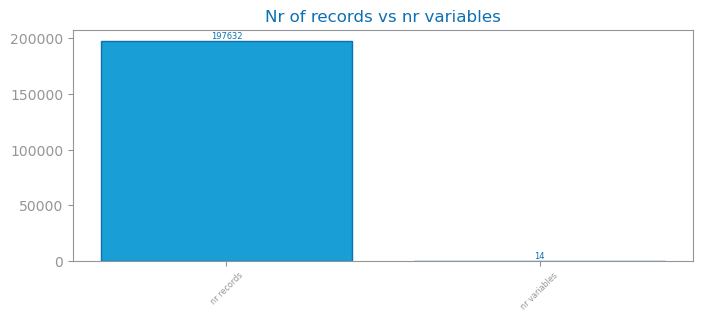

In [31]:
from matplotlib.pyplot import figure, savefig, show


figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

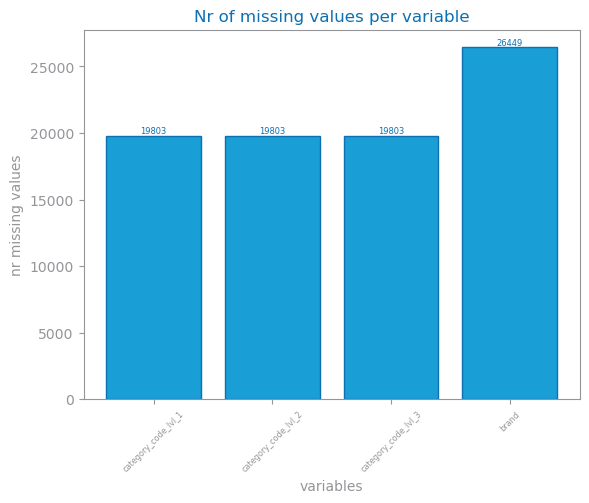

In [32]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

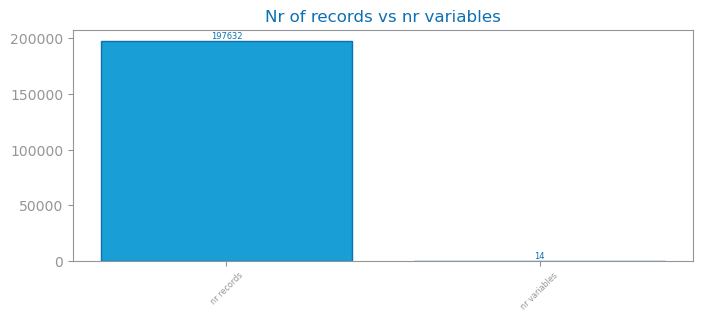

In [33]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(8, 3))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

conversion
not_purchase    189789
purchase          7843
Name: count, dtype: int64


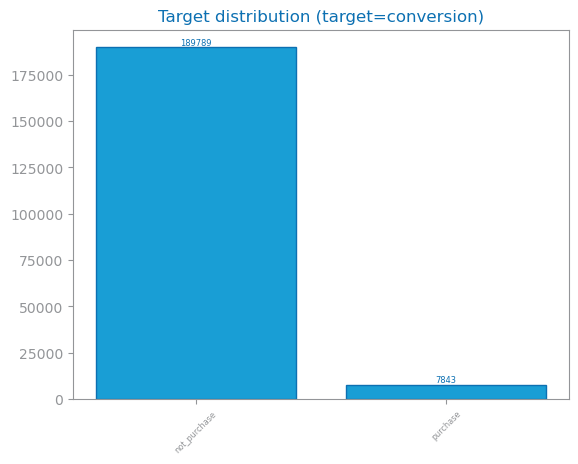

In [34]:
from matplotlib.pyplot import savefig, show
target = "conversion"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

# Save final df from pre_processing phase into a csv file
- We will use this dataset for the next phase - data profiling

In [35]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_pre_proc_v2.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)